<a href="https://colab.research.google.com/github/swami-gait/Foundations_of_datascience/blob/master/FDS_WK12_DataViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])
import seaborn as sns
sns.set(color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Plotting the composition of data

### Static  Composition

In [2]:
p=sns.load_dataset('penguins')

In [3]:
p.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
c=p.groupby(by='species')['species'].count()

#### Pie Charts

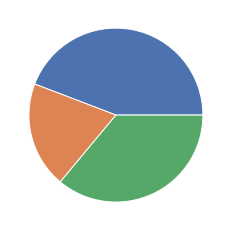

In [5]:
plt.pie(c);

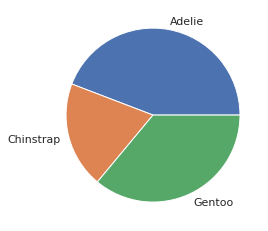

In [6]:
plt.pie(c,labels=c.index);

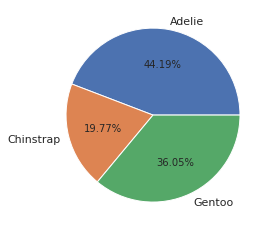

In [7]:
plt.pie(c,labels=c.index,autopct="%.2f%%");

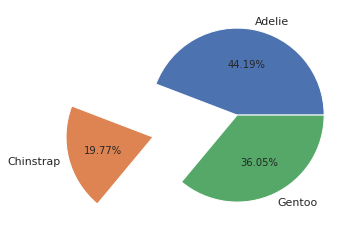

In [8]:
plt.pie(c,labels=c.index,autopct="%.2f%%",explode=[0,1,0]);

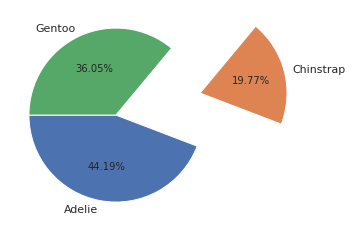

In [9]:
plt.pie(c,labels=c.index,autopct="%.2f%%",explode=[0,1,0],startangle=180);

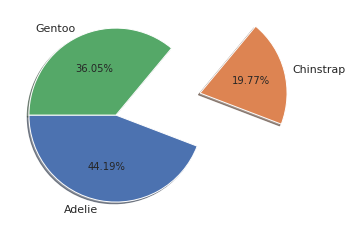

In [10]:
plt.pie(c,labels=c.index,autopct="%.2f%%",explode=[0,1,0],startangle=180,shadow=True);

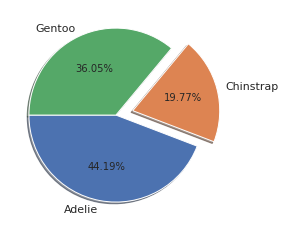

In [11]:
plt.pie(c,labels=c.index,autopct="%.2f%%",explode=[0,0.2,0],startangle=180,shadow=True);

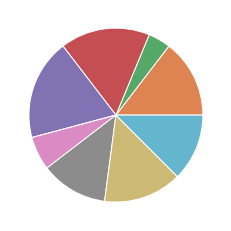

In [12]:
plt.pie(np.random.randint(0,10,10));

####Donut charts


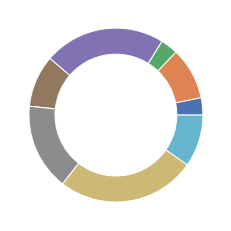

In [13]:
plt.pie(np.random.randint(0,10,10),wedgeprops=dict(width=0.3));

In [14]:
cmap = plt.get_cmap('Accent')
my_colours = cmap(np.arange(10))

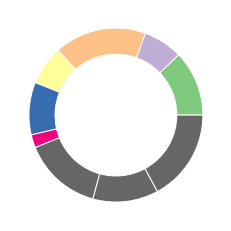

In [15]:
plt.pie(np.random.randint(0,10,10),wedgeprops=dict(width=0.3),colors=my_colours);

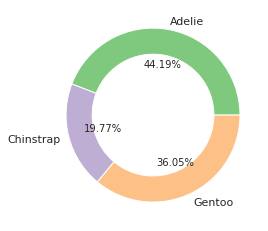

In [16]:
plt.pie(c,labels=c.index,autopct="%.2f%%",wedgeprops=dict(width=0.3),colors=my_colours);

In [17]:
c_i=p.groupby(by='island')['island'].count()

In [18]:
c_i

island
Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

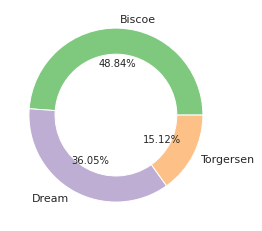

In [19]:
plt.pie(c_i,labels=c_i.index,autopct="%.2f%%",wedgeprops=dict(width=0.3),colors=my_colours);

In [20]:
c = pd.crosstab(p.species,p.island)

In [21]:
c = c.T

In [22]:
c

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,124
Dream,56,68,0
Torgersen,52,0,0


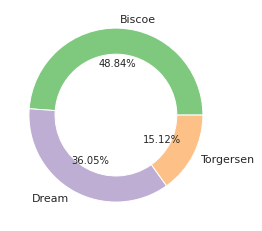

In [23]:
plt.pie(c.sum(axis=1),labels=c.index,radius=1,autopct="%.2f%%",wedgeprops=dict(width=0.3),colors=my_colours);

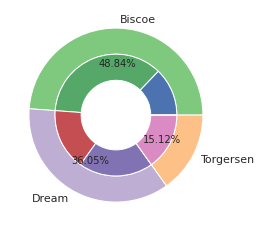

In [24]:
plt.pie(c.sum(axis=1),labels=c.index,radius=1,autopct="%.2f%%",wedgeprops=dict(width=0.3),colors=my_colours);
plt.pie(c.values.flatten(),radius=0.7,wedgeprops=dict(width=0.3));

In [25]:
cmap = plt.get_cmap('tab20c')
outer_colors=cmap(np.array([0,4,8]))
inner_colors = cmap(np.array([1,2,3,5,6,7,9,10,11]))

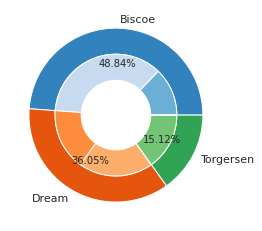

In [26]:
plt.pie(c.sum(axis=1),labels=c.index,radius=1,autopct="%.2f%%",wedgeprops=dict(width=0.3),colors=outer_colors);
plt.pie(c.values.flatten(),radius=0.7,wedgeprops=dict(width=0.3),colors=inner_colors);

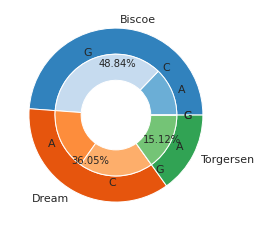

In [27]:
plt.pie(c.sum(axis=1),labels=c.index,radius=1,autopct="%.2f%%",wedgeprops=dict(width=0.3),colors=outer_colors);
plt.pie(c.values.flatten(),radius=0.7,wedgeprops=dict(width=0.3),colors=inner_colors,labels=['A','C','G','A','C','G','A','C','G']);

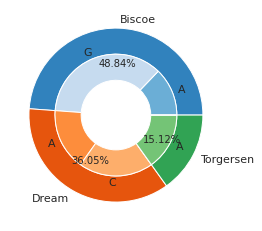

In [28]:
plt.pie(c.sum(axis=1),labels=c.index,radius=1,autopct="%.2f%%",wedgeprops=dict(width=0.3),colors=outer_colors);
plt.pie(c.values.flatten(),radius=0.7,wedgeprops=dict(width=0.3),colors=inner_colors,labels=['A','','G','A','C','','A','','']);

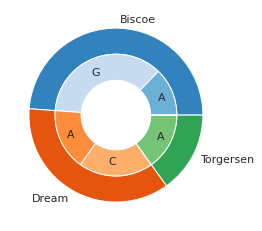

In [29]:
plt.pie(c.sum(axis=1),labels=c.index,radius=1,wedgeprops=dict(width=0.3),colors=outer_colors);
plt.pie(c.values.flatten(),radius=0.7,wedgeprops=dict(width=0.3),colors=inner_colors,labels=['A','','G','A','C','','A','',''],labeldistance=0.75);

### Stacked bar plots

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import json

In [29]:
url = 'https://api.covid19india.org/states_daily.json'
urllib.request.urlretrieve(url,'data.json');
with open('data.json') as f:
    data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)